<a href="https://colab.research.google.com/github/Nikhitha-Math/python_assignment/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Prediction:**

**Objective**: You are tasked with developing a machine learning model to predict customer churn
for a telecommunications company. The company wants to identify which customers are likely to
leave (churn) and target them with retention offers. Your goal is to create a machine learning
model that accurately predicts customer churn based on historical customer data

Libraries

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from IPython.display import display, Markdown
from sklearn.model_selection import GridSearchCV

In [205]:
#mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
df_churn=pd.read_csv("/content/drive/MyDrive/data/Training_data.csv")
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


EDA

In [207]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [208]:
#removing duplicates
print("Duplicate rows before removal:", df_churn.duplicated().sum())
df_churn= df_churn.drop_duplicates()

Duplicate rows before removal: 0


In [209]:
missing = df_churn.isnull().sum()
missing


,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [210]:
#droping customer id
df_churn.drop(columns=['customerID'], inplace=True)


In [211]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


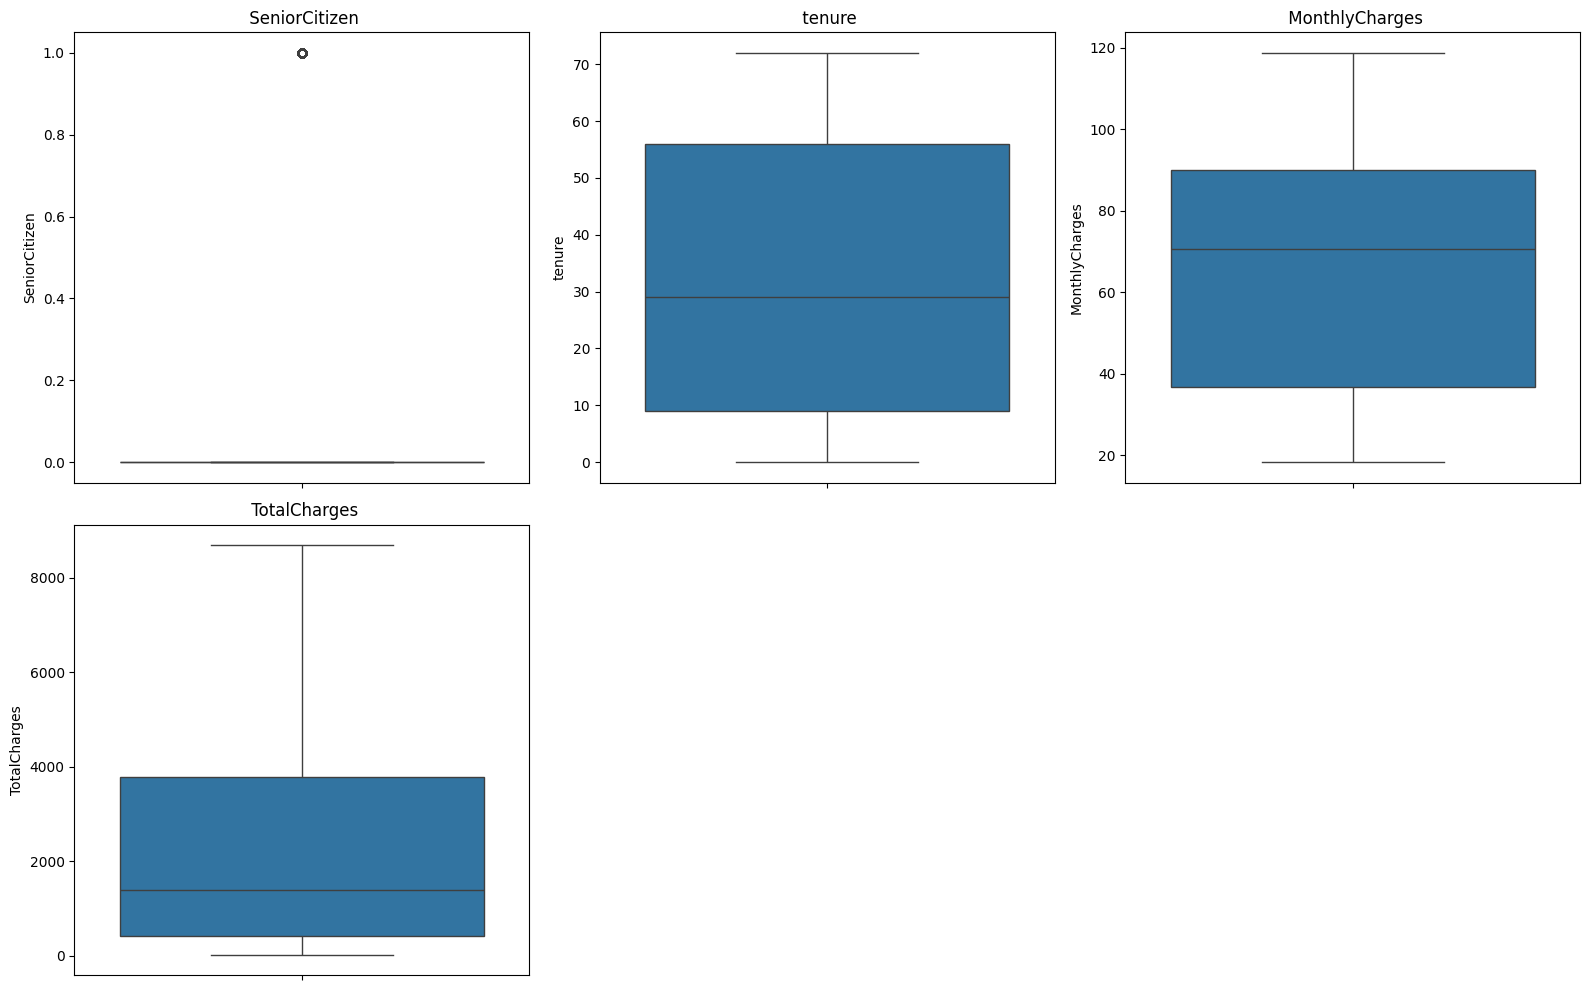

In [212]:
#visualise outliers
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
num_cols = df_churn.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols[:6]):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_churn[col])
    plt.title(f' {col}')
    plt.tight_layout()

<Axes: xlabel='Churn', ylabel='count'>

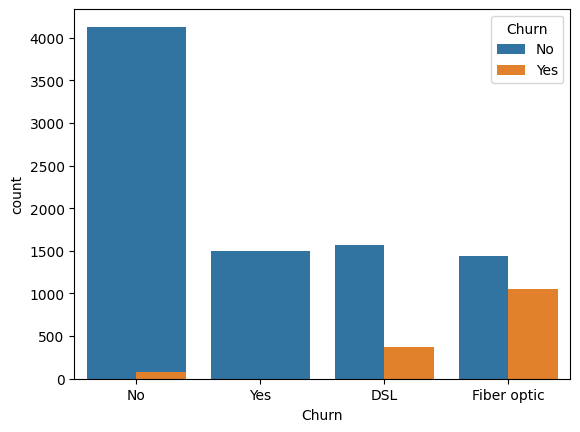

In [213]:
#visualisation of distribution of target wrt features
# Churn distribution (target imbalance)
sns.countplot(x='Churn', data=df_churn)

# Countplot for categorical features
sns.countplot(x='InternetService', hue='Churn', data=df_churn)



<Axes: xlabel='Contract', ylabel='count'>

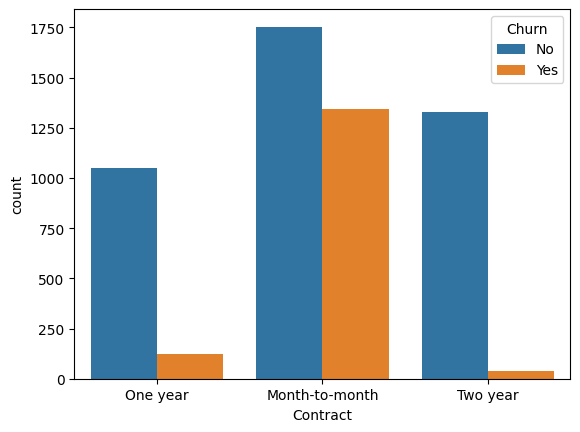

In [214]:
# Countplot for categorical features
sns.countplot(x='Contract', hue='Churn', data=df_churn)

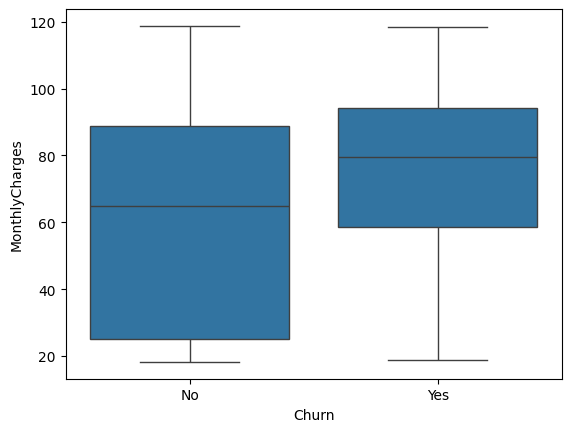

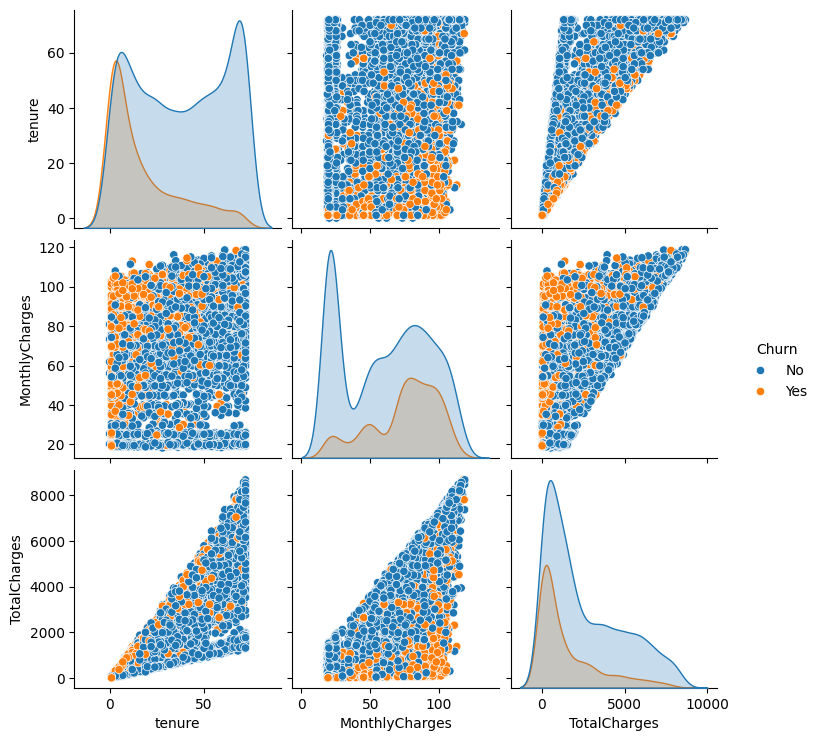

In [215]:
# Boxplot for numerical features vs churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_churn)

# Pairplot (good for numeric-only)
sns.pairplot(df_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

Data Preprocessing

In [216]:
#handling null values
# Fill missing values with the mode (most frequent value)
categorical_features = ['gender', 'OnlineSecurity']
for col in categorical_features:
    mode_val = df_churn[col].mode()[0]
    df_churn[col] = df_churn[col].fillna(mode_val)

# Fill missing values with median (less sensitive to outliers)
numerical_features = ['MonthlyCharges', 'TotalCharges']
for col in numerical_features:
    median_val = df_churn[col].median()
    df_churn[col] = df_churn[col].fillna(median_val)


print( df_churn.isnull().sum())



gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [217]:
#handling outliers
num_cols = df_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    Q1 = df_churn[col].quantile(0.25)
    Q3 = df_churn[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_churn[col] = df_churn[col].clip(lower=lower_bound, upper=upper_bound)


In [218]:
#scaling
# Drop target column to scale only features
numerical_cols = df_churn.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'Churn']
print("🔢 Numerical columns to scale:", numerical_cols)

scaler = StandardScaler()
df_churn[numerical_cols] = scaler.fit_transform(df_churn[numerical_cols])
df_churn



🔢 Numerical columns to scale: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0.0,No,No,0.097232,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,-1.541793,-0.694206,No
1,Female,0.0,No,No,-0.187173,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,-1.024876,-0.576355,No
2,Male,0.0,No,No,0.950447,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,1.141008,1.509992,No
3,Male,0.0,Yes,No,0.259749,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),-1.552131,-0.653763,No
4,Female,0.0,Yes,Yes,0.422266,No,No phone service,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),-0.490728,-0.038831,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0.0,No,No,0.747300,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,1.154792,1.264805,No
5630,Male,0.0,Yes,No,1.437998,No,No phone service,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,-0.811217,0.328859,No
5631,Male,0.0,Yes,Yes,1.600515,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),-1.569362,-0.413115,No
5632,Female,0.0,No,No,1.478627,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0.584460,1.498363,No


In [219]:
#encoding
cat_columns = df_churn.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_columns)

cat_columns = [col for col in cat_columns if col not in ['Churn']]
df_churn['Churn'] = df_churn['Churn'].map({'Yes': 1, 'No': 0})
df_churn= pd.get_dummies(df_churn,dtype=int, columns=cat_columns, drop_first=True)

df_churn.head()



Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.097232,-1.541793,-0.694206,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,0.0,-0.187173,-1.024876,-0.576355,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.950447,1.141008,1.509992,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
3,0.0,0.259749,-1.552131,-0.653763,0,1,1,0,1,0,...,1,0,1,0,0,1,1,0,0,0
4,0.0,0.422266,-0.490728,-0.038831,0,0,1,1,0,1,...,0,1,0,0,1,0,1,0,0,0


Feature Engineering

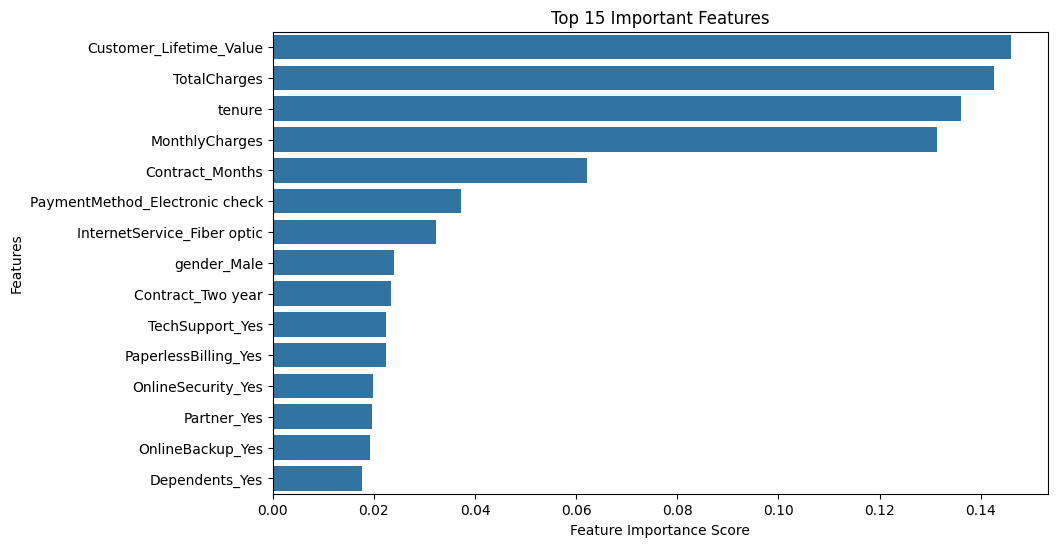

In [220]:
df_churn['Contract_Months'] = (
    df_churn['Contract_One year'] * 12 +
    df_churn['Contract_Two year'] * 24
).fillna(0)
# Month-to-month is assumed 0
# Customer Lifetime Value = Tenure × Monthly Charges
df_churn['Customer_Lifetime_Value'] = df_churn['tenure'] * df_churn['MonthlyCharges']


# Split X and y
X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

# Fit RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()



Model Development

In [221]:
#splitting data
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_churn.drop('Churn', axis=1)
y = df_churn['Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [222]:
#building logistic regression model
log_reg_model=LogisticRegression()
log_reg_model.fit(X_train,y_train)#training the model
y_pred_logreg=log_reg_model.predict(X_test)#predicting test data

#evaluate the model
accuracy_logreg=accuracy_score(y_test,y_pred_logreg)
precision_logreg=precision_score(y_test,y_pred_logreg,average="weighted")
recall_logreg=recall_score(y_test,y_pred_logreg,average="weighted")


print("Accuracy:",accuracy_logreg)
print("Precision:",precision_logreg)
print("Recall:",recall_logreg)



Accuracy: 0.7870452528837621
Precision: 0.7796784197331341
Recall: 0.7870452528837621


In [223]:
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)#training model
y_pred_knn=knn_model.predict(X_test)#prediction

accuracy_knn=accuracy_score(y_test,y_pred_knn)
precision_knn=precision_score(y_test,y_pred_knn,average="weighted")
recall_knn=recall_score(y_test,y_pred_knn,average="weighted")

print("Accuracy:",accuracy_knn)
print("Precision:",precision_knn)
print("Recall:",recall_knn)

Accuracy: 0.7391304347826086
Precision: 0.7354102074598969
Recall: 0.7391304347826086


In [224]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb=nb_model.predict(X_test)

accuracy_nb=accuracy_score(y_test,y_pred_nb)
precision_nb=precision_score(y_test,y_pred_nb,average="weighted")
recall_nb=recall_score(y_test,y_pred_nb,average="weighted")

print("Accuracy:",accuracy_nb)
print("Precision:",precision_nb)
print("Recall:",recall_nb)

Accuracy: 0.6530612244897959
Precision: 0.7781943169612343
Recall: 0.6530612244897959


In [225]:
display(Markdown(" Model Comparison:"))
model_results = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes'],
    'Accuracy': [accuracy_logreg, accuracy_knn, accuracy_nb],
    'Precision': [precision_logreg, precision_knn, precision_nb],
    'Recall': [recall_logreg, recall_knn, recall_nb]
}

# Create the DataFrame
df_results = pd.DataFrame(model_results)
display(df_results)


 Model Comparison:

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.787045,0.779678,0.787045
1,K-Nearest Neighbors,0.739130,0.735410,0.739130
2,Naive Bayes,0.653061,0.778194,0.653061


Model Fine-Tuning

In [226]:
# Logistic Regression
param_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), param_log, cv=5, scoring='f1_weighted')
grid_log.fit(X_train, y_train)
best_log = grid_log.best_estimator_

# KNN
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='f1_weighted')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

# Use the best estimators from tuning
best_nb = GaussianNB()  # Re-define in case not tuned

# Dictionary of tuned models
models = {
    "Logistic Regression": best_log,
    "KNN": best_knn,
    "Naive Bayes": best_nb,

}

# Store results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    })

# Display results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print("🔍 Model Evaluation Results (After Hyperparameter Tuning)")
display(results_df)




🔍 Model Evaluation Results (After Hyperparameter Tuning)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.787045,0.779678,0.787045,0.781874
1,KNN,0.761313,0.755454,0.761313,0.757839
2,Naive Bayes,0.653061,0.778194,0.653061,0.667992




*   Logistic Regression is still the best performer even after tuning – with the highest accuracy, recall, and F1 Score
*   KNN showed improvement from earlier
*  Naive Bayes still has good precision but poor overall accuracy and F1, likely due to its strong independence assumptions not fitting the data well.



*   Hyperparameter Tuning was  Effective,especially for KNN..
*   For Logistic Regression, parameters were already well-tuned and For Naive Bayes, tuning has limited effect due to fewer hyperparameters and model simplicity

Choose Logistic Regression as the final model because of its Best overall evaluation metrics,Consistent before & after tuning and Interpretable and efficient.

**Business Recommendations**
* Focus on customers with short contracts and high monthly charges — they  are more likely to churn.

* Offer discounts or loyalty benefits to long-tenure users to improve retention.

* Improve customer support and service quality, especially for users with no internet or tech support.











